In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\FraudDetectionData.csv")

In [3]:
df.head(7)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


In [4]:
df.shape

(6362620, 11)

In [5]:
print(df["isFraud"].unique())

[0 1]


In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df[df.isnull().any(axis=1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


# Duplicates

In [8]:
# # check for duplicates
# duplicates = df.duplicated()

# # print the duplicated rows
# print(df[duplicates])

# Correlation Matrix

In [ ]:
import pandas as pd
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap='mako', center=0, annot=True)

# Unimodial vs Multimodial (Shape distribution)

In [ ]:
features=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [ ]:
import matplotlib.pyplot as plt
import warnings
plt.figure(figsize=(20,8))
warnings.filterwarnings('ignore')

for feature in features:
    plt.subplot(2,3,features.index(feature)+1)
    sns.distplot(df[feature],hist=True,color='purple')
plt.show()

# Payment Channels

In [ ]:
# #Create New DataFrame with Count
# new_df = df["type"].value_counts().rename_axis('types_of_transaction').reset_index(name='counts')
# new_df.head()

# #Set lables and values
# my_labels = new_df.types_of_transaction
# my_values = new_df.counts

# #Visualize the pie chart
# fig=plt.figure(figsize=(3,3)) # Resize
# wp= {'linewidth':0.5,'edgecolor':"black"}
# ax=fig.add_axes([0,0,1,1]) # Add axis to the figure
# ax.axis('equal')
# explode=(0.1,0.1,0.1,0.1,0.1)
# ax.pie(my_values, labels=my_labels, autopct='%1.2f%%',explode=explode,shadow=True,wedgeprops=wp)
# font = {'fontname':'Comic Sans MS'} # Change font
# plt.title('Type of Transactions',fontsize=20,color='purple',**font,fontweight='bold')
# plt.legend(['CASH_OUT', 'PAYMENT', 'CASH_IN','TRANSFER','DEBIT'])
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
# plt.show()

# Barplot to show class imbalance

In [ ]:
# Map the values in the isFraud column to Non-Fraud and Fraud
df["isFraud"] = df["isFraud"].map({0: "Non-Fraud", 1: "Fraud"})

In [ ]:
df.head(3)

In [ ]:
# Get the value counts of the isFraud column
counts = df['isFraud'].value_counts().rename_axis('isFraud').reset_index(name='count')
counts

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot the count of Non-Fraud and Fraud using a barplot
plt.figure(figsize=(5.5, 5.5))
sns.barplot(x='isFraud', y='count', data=counts, color='pink', edgecolor ="b")
plt.title('Count of Non-Fraudulent & Fraudulent Transactions')
plt.show()

In [ ]:
df["isFraud"] = df["isFraud"].replace({"Non-Fraud": 0, "Fraud": 1})

In [ ]:
print(df["isFraud"].unique())

# Feature Encoding on entire dataset 

In [ ]:
df.isnull().sum()

In [9]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
# Creating a instance of label Encoder.
le = LabelEncoder()
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['type'])
# printing label
label
# removing the column 'type' from df
# as it is of no use now.
df.drop("type", axis=1, inplace=True)
# Appending the array to our dataFrame
# with column name 'type'
df["type"] = label
# printing Dataframe
#df

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['nameDest'])
label
df.drop("nameDest", axis=1, inplace=True)
df["nameDest"] = label
#df

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['nameOrig'])
label
df.drop("nameOrig", axis=1, inplace=True)
df["nameOrig"] = label
#df

In [12]:
df.head(7)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type,nameDest,nameOrig
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,3,1662094,757869
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,3,1733924,2188998
2,1,181.00,181.0,0.00,0.0,0.0,1,0,4,439685,1002156
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,391696,5828262
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,3,828919,3445981
5,1,7817.71,53860.0,46042.29,0.0,0.0,0,0,3,2247218,6026525
6,1,7107.77,183195.0,176087.23,0.0,0.0,0,0,3,2063363,1805947


In [ ]:
# Check the number of rows in the dataset
num_rows_df = df.shape[0]
print("Number of rows in the dataset:", num_rows_df)

# Split into train, validation and test

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop('isFraud', axis=1)
# Separate the target variable
y = df['isFraud']

# Print class distribution before split
print(y.value_counts(normalize=True))

from sklearn.model_selection import train_test_split

# Assuming X contains your features and y contains your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=18)

# Print class distribution after split
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.998709
1    0.001291
Name: isFraud, dtype: float64
0    0.998709
1    0.001291
Name: isFraud, dtype: float64
0    0.99871
1    0.00129
Name: isFraud, dtype: float64


# Safe-Level SMOTE:

# Adaptive Synthetic Sampling (ADASYN): 

# Borderline SMOTE: 

# Save train, test sets to csv

In [ ]:
# import pandas as pd

# # Create a DataFrame from X_val and y_val
# val_df = pd.DataFrame(X_val, columns=X_train.columns)
# val_df['isFraud'] = y_val

# # Save the DataFrame to a CSV file
# val_df.to_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\validation.csv", index=False)

In [ ]:
X_train.to_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\train.csv", index=False)
X_test.to_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\test.csv", index=False)

In [ ]:
print(X_train.shape)

# Fitting distributions

C:\Users\23059\anaconda3\envs\test2\lib\site-packages\scipy\stats\_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\23059\anaconda3\envs\test2\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Best-fit distribution: weibull_min
Parameters: (0.6343233027228539, -9.553720436086127e-16, 120284.48206298887)


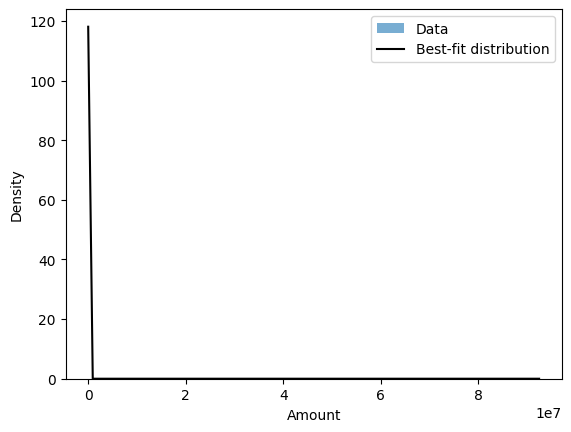

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm, expon, chi2, beta, weibull_min

# Extract column values
col_values = X_train['amount'].values

# Fit common distributions to column and compute AIC
distributions = [lognorm, chi2, beta, weibull_min]
params = []
log_likelihoods = []
aics = []
for dist in distributions:
    dist_params = dist.fit(col_values)
    log_likelihood = dist.logpdf(col_values, *dist_params).sum()
    aic = -2 * log_likelihood + 2 * len(dist_params)
    params.append(dist_params)
    log_likelihoods.append(log_likelihood)
    aics.append(aic)

# Select best-fit distribution based on AIC
best_dist_idx = np.argmin(aics)
best_dist = distributions[best_dist_idx]
best_params = params[best_dist_idx]

# Print best-fit distribution and parameters
print(f"Best-fit distribution: {best_dist.name}")
print(f"Parameters: {best_params}")

# Generate PDF of best-fit distribution
x = np.linspace(min(col_values), max(col_values), 100)
pdf = best_dist.pdf(x, *best_params)

# Plot histogram and PDF
plt.hist(col_values, bins=20, density=True, alpha=0.6, label='Data')
plt.plot(x, pdf, 'k-', label='Best-fit distribution')
plt.legend()
plt.xlabel('Amount')
plt.ylabel('Density')
plt.show()

Best-fit distribution: weibull_min
Parameters: (0.16868606033804737, -4.873318261906871e-23, 946251.3385809583)


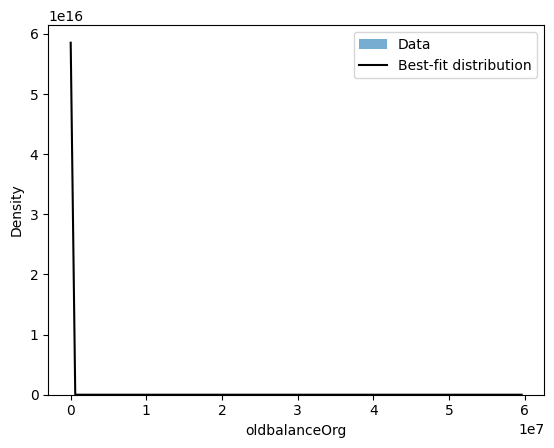

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm, expon, chi2, beta, weibull_min

# Extract column values
col_values = X_train['oldbalanceOrg'].values

# Fit common distributions to column and compute AIC
distributions = [lognorm, chi2, beta, weibull_min]
params = []
log_likelihoods = []
aics = []
for dist in distributions:
    dist_params = dist.fit(col_values)
    log_likelihood = dist.logpdf(col_values, *dist_params).sum()
    aic = -2 * log_likelihood + 2 * len(dist_params)
    params.append(dist_params)
    log_likelihoods.append(log_likelihood)
    aics.append(aic)

# Select best-fit distribution based on AIC
best_dist_idx = np.argmin(aics)
best_dist = distributions[best_dist_idx]
best_params = params[best_dist_idx]

# Print best-fit distribution and parameters
print(f"Best-fit distribution: {best_dist.name}")
print(f"Parameters: {best_params}")

# Generate PDF of best-fit distribution
x = np.linspace(min(col_values), max(col_values), 100)
pdf = best_dist.pdf(x, *best_params)

# Plot histogram and PDF
plt.hist(col_values, bins=20, density=True, alpha=0.6, label='Data')
plt.plot(x, pdf, 'k-', label='Best-fit distribution')
plt.legend()
plt.xlabel('oldbalanceOrg')
plt.ylabel('Density')
plt.show()

Best-fit distribution: beta
Parameters: (0.4434692801624524, 18492.3845554118, -1.565314512617626e-11, 7142522725.729774)


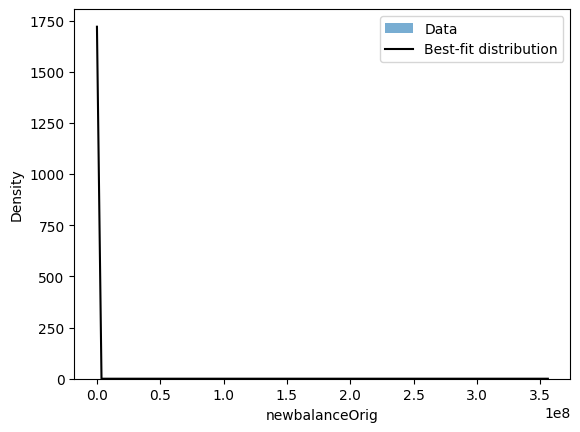

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm, expon, chi2, beta, weibull_min, pareto, expon

# Extract column values
col_values = X_train['oldbalanceDest'].values

# Fit common distributions to column and compute AIC
distributions = [beta, weibull_min, pareto, expon]
params = []
log_likelihoods = []
aics = []
for dist in distributions:
    dist_params = dist.fit(col_values)
    log_likelihood = dist.logpdf(col_values, *dist_params).sum()
    aic = -2 * log_likelihood + 2 * len(dist_params)
    params.append(dist_params)
    log_likelihoods.append(log_likelihood)
    aics.append(aic)

# Select best-fit distribution based on AIC
best_dist_idx = np.argmin(aics)
best_dist = distributions[best_dist_idx]
best_params = params[best_dist_idx]

# Print best-fit distribution and parameters
print(f"Best-fit distribution: {best_dist.name}")
print(f"Parameters: {best_params}")

# Generate PDF of best-fit distribution
x = np.linspace(min(col_values), max(col_values), 100)
pdf = best_dist.pdf(x, *best_params)

# Plot histogram and PDF
plt.hist(col_values, bins=20, density=True, alpha=0.6, label='Data')
plt.plot(x, pdf, 'k-', label='Best-fit distribution')
plt.legend()
plt.xlabel('oldbalanceDest')
plt.ylabel('Density')
plt.show()

Best-fit distribution: beta
Parameters: (0.7360007548671474, 18761.39582226896, -1.3025876089027974e-20, 9382229863.481894)


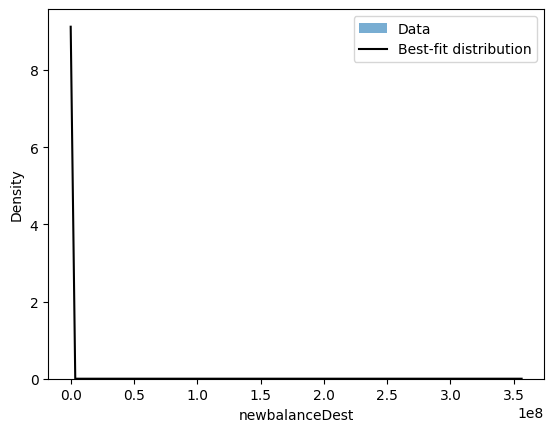

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm, expon, chi2, beta, weibull_min, pareto, expon

# Extract column values
col_values = X_train['newbalanceDest'].values

# Fit common distributions to column and compute AIC
distributions = [beta, weibull_min, pareto, expon]
params = []
log_likelihoods = []
aics = []
for dist in distributions:
    dist_params = dist.fit(col_values)
    log_likelihood = dist.logpdf(col_values, *dist_params).sum()
    aic = -2 * log_likelihood + 2 * len(dist_params)
    params.append(dist_params)
    log_likelihoods.append(log_likelihood)
    aics.append(aic)

# Select best-fit distribution based on AIC
best_dist_idx = np.argmin(aics)
best_dist = distributions[best_dist_idx]
best_params = params[best_dist_idx]

# Print best-fit distribution and parameters
print(f"Best-fit distribution: {best_dist.name}")
print(f"Parameters: {best_params}")

# Generate PDF of best-fit distribution
x = np.linspace(min(col_values), max(col_values), 100)
pdf = best_dist.pdf(x, *best_params)

# Plot histogram and PDF
plt.hist(col_values, bins=20, density=True, alpha=0.6, label='Data')
plt.plot(x, pdf, 'k-', label='Best-fit distribution')
plt.legend()
plt.xlabel('newbalanceDest')
plt.ylabel('Density')
plt.show()

C:\Users\23059\anaconda3\envs\test2\lib\site-packages\scipy\stats\_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


Best-fit distribution: gamma
Parameters: (0.23096675589582163, -3.224740952872686e-26, 9348412.462938527)


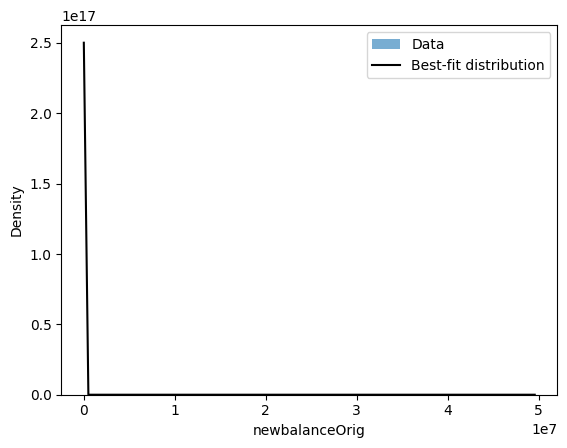

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min, pareto, gamma


# Extract column values
col_values = X_train['newbalanceOrig'].values

# Fit common distributions to column and compute AIC
distributions = [weibull_min, pareto ,gamma]

params = []
log_likelihoods = []
aics = []
for dist in distributions:
    dist_params = dist.fit(col_values)
    log_likelihood = dist.logpdf(col_values, *dist_params).sum()
    aic = -2 * log_likelihood + 2 * len(dist_params)
    params.append(dist_params)
    log_likelihoods.append(log_likelihood)
    aics.append(aic)

# Select best-fit distribution based on AIC
best_dist_idx = np.argmin(aics)
best_dist = distributions[best_dist_idx]
best_params = params[best_dist_idx]

# Print best-fit distribution and parameters
print(f"Best-fit distribution: {best_dist.name}")
print(f"Parameters: {best_params}")

# Generate PDF of best-fit distribution
x = np.linspace(min(col_values), max(col_values), 100)
pdf = best_dist.pdf(x, *best_params)

# Plot histogram and PDF
plt.hist(col_values, bins=20, density=True, alpha=0.6, label='Data')
plt.plot(x, pdf, 'k-', label='Best-fit distribution')
plt.legend()
plt.xlabel('newbalanceOrig')
plt.ylabel('Density')
plt.show()

# OUTLIER LABELING

# IQR

In [ ]:
import pandas as pd

# Select the columns you want to check for outliers
columns_to_trim = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Calculate IQR for each column
q1 = X_train[columns_to_trim].quantile(0.25)
q3 = X_train[columns_to_trim].quantile(0.75)
iqr = q3 - q1

# Determine the lower and upper boundaries for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Count the number of lower and upper outliers in each column
num_lower_outliers = (X_train[columns_to_trim] < lower_bound).sum()
num_upper_outliers = (X_train[columns_to_trim] > upper_bound).sum()

# Print results
print(f"Number of lower outliers:\n",num_lower_outliers)
print(f"\n")
print(f"Number of upper outliers:\n",num_upper_outliers)

# Modified Z-score 

In [ ]:
# Select the columns you want to check for outliers
columns_to_trim = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Calculate modified Z-score for each column
for col in columns_to_trim:
    # Extract column values
    col_values = X_train[col].values

    # Calculate median and MAD
    med = np.median(col_values)
    mad = np.median(np.abs(col_values - med))
    if mad == 0:
        mad = 1e-6  # Set MAD to a small non-zero value to avoid division by zero

    # Calculate modified Z-score
    z_score = 0.6745 * (col_values - med) / mad

    # Count number of lower and upper outliers
    lower_outliers = np.sum(z_score < -2.5)
    upper_outliers = np.sum(z_score > 2.5)

    # Print results
    print(f"Column {col}")
    print(f"Number of lower outliers for column: {lower_outliers}")
    print(f"Number of upper outliers: {upper_outliers}")
    print(f"\n")

# Mean Absolute Deviation

In [ ]:
# import numpy as np
# # Define the columns of interest
# columns_to_trim = ['amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest']

# # Define the threshold for outliers
# threshold = 2

# # Loop over the columns of interest and calculate the number of outliers for each column in the train set
# for column in columns_to_trim:
#     # Calculate the median and MAD for the column in the train set
#     median_train = np.median(X_train[column])
#     abs_deviation_train = np.abs(X_train[column] - median_train)
#     mad_train = np.median(abs_deviation_train)
#     # Calculate the upper and lower thresholds based on the MAD
#     upper_threshold = median_train + threshold * mad_train
#     lower_threshold = median_train - threshold * mad_train
#     # Identify the number of outliers in the train set for each threshold
#     num_upper_outliers_train = np.sum(X_train[column] > upper_threshold)
#     num_lower_outliers_train = np.sum(X_train[column] < lower_threshold)
    
#     print(f"Number of lower outliers in {column} in train set:{num_lower_outliers_train}")
#     print(f"Number of upper outliers in {column} in train set:{num_upper_outliers_train}")

In [ ]:
import pandas as pd
import numpy as np

# Extract the columns of interest from X_train
cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
data = X_train[cols]

# Loop over each column and find outliers using the IQR method
for col in cols:
    # Calculate the median and IQR of the column
    median = np.median(data[col])
    iqr = np.percentile(data[col], 75) - np.percentile(data[col], 25)

    # Calculate the lower and upper bounds for outliers
    lower_bound = np.percentile(data[col], 25) - 1.5 * iqr
    upper_bound = np.percentile(data[col], 75) + 1.5 * iqr

    # Identify outliers in the column using a boolean mask
    outliers_lower = data[col] < lower_bound
    outliers_upper = data[col] > upper_bound
    outliers = outliers_lower | outliers_upper

    # Print the number of outliers and their proportion in the column
    num_outliers = outliers.sum()
    prop_outliers = num_outliers / data.shape[0]
    print(f"Column {col} has {num_outliers} outliers ({prop_outliers:.2%

# Generalized Boxplot

# Estimate direction and proportion of trimming

Is Kolmogorov-Smirnov (K-S) test or the Anderson-Darling (A-D) appropriate when I have extremely lots of data? won't the p-values be misleading if i have too many data
When you have a very large amount of data, the p-values from the Kolmogorov-Smirnov (K-S) test or the Anderson-Darling (A-D) test may be misleading due to their sensitivity to sample size. In large samples, even small differences between the distributions of the two tails may lead to rejecting the null hypothesis and concluding that the distributions are significantly different, even if the differences are not practically meaningful.

In such cases, you may consider using visual methods such as histograms, boxplots, or quantile-quantile (Q-Q) plots to assess the symmetry and tail behavior of the distribution. These visual methods can help you get a better sense of the shape and spread of the data and make a more informed decision about whether to use symmetric or asymmetric trimming.

Alternatively, you can consider using robust statistical methods that are less sensitive to outliers and heavy-tailed distributions. For example, you can use trimmed means or medians to estimate the center of the distribution instead of the sample mean or median, and use trimmed standard deviations or interquartile ranges to estimate the spread of the distribution instead of the sample standard deviation.

In [ ]:
import pandas as pd
import numpy as np


# Extract the columns of interest
cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
data = X_train[cols]

# Loop over each column and determine the direction of trimming
for col in cols:
    # Calculate the median and interquartile range of the column
    median = np.median(data[col])
    iqr = np.percentile(data[col], 75) - np.percentile(data[col], 25)

    # Calculate the skewness of the column
    skewness = data[col].skew()

    # Determine whether to use symmetric or asymmetric trimming based on the skewness and IQR
    if abs(skewness) > 1.5 or iqr > 2 * abs(median):
        print(f"For column {col}, the data is skewed and heavy-tailed, so asymmetric trimming may be appropriate.")
    else:
        print(f"For column {col}, the data is roughly symmetric, so symmetric trimming may be appropriate.")

# Winsorized bootstrapping

This output is for the column 'amount' and contains the following information:

Trimmed Mean: This is the mean of the bootstrapped samples after trimming the outliers based on the specified trimming proportion. It is equal to 91803.12538081642 for the 'amount' column.
95% Bootstrap Confidence Interval (T-Distribution): This is the range of values within which the true mean of the population lies with 95% confidence. It is calculated using the t-distribution and is equal to [179959.81816440757, 180125.3084492971] for the 'amount' column. This means that if we were to repeat this sampling process multiple times and compute the 95% confidence interval each time, we would expect the true mean of the population to lie within this interval 95% of the time.

The trimmed mean is an estimation of the central tendency of the amount column after trimming the outliers. The 95% Bootstrap Confidence Interval (T-Distribution) is an interval estimate of the population mean based on the bootstrapped samples.

The interval [179959.81816440757, 180125.3084492971] suggests that if we were to repeat the bootstrap process many times and create 95% confidence intervals for each of these iterations, then 95% of the intervals would contain the true population mean.

So, in this case, we can interpret the interval as a measure of the precision of the estimate of the population mean. The interval is relatively narrow, which indicates that the estimate of the population mean is relatively precise. However, it is worth noting that the interval is based on a relatively small number of bootstrap samples (50), and it is possible that the interval could be wider with a larger number of bootstrap samples.

In [ ]:
# Import numpy library
import numpy as np
from scipy import stats


# # Specify columns with outliers
cols_with_outliers = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Specify the number of bootstrapped samples to create per column
num_samples = 50

# Specify the trimming proportions for each column
trim_props = {'amount': 0.27, 'oldbalanceOrg': 0.3, 'newbalanceOrig': 0.3, 'oldbalanceDest': 0.35, 'newbalanceDest': 0.34}

# Initialize empty dictionaries to store the trimmed means for each column separately for the train and test set
train_trimmed_means = {}
#test_trimmed_means = {}

# Loop over the specified columns
for col_name in cols_with_outliers:
    
    # Initialize empty lists to store the bootstrapped samples and the trimmed means for the train and test set
    train_bootstrapped_samples = []
    #test_bootstrapped_samples = []
    train_trimmed_means_list = []
    #test_trimmed_means_list = []
    
      # Check if the trimming proportion for this column is 0
    if trim_props[col_name] == 0:
        # If so, skip this column and move on to the next one
        continue
    
    # Loop over the number of desired samples
    for i in range(num_samples):
        # Randomly select indices from the column in the training set
        train_sample_indices = np.random.choice(X_train.index, size=len(X_train), replace=True)
        
        # Create a bootstrapped sample by indexing into the column with the selected indices for the training set
        # is a line of code that creates a bootstrapped sample for a particular column (col_name) in the training set.
        train_sample = X_train.loc[train_sample_indices, col_name]
        
        # Randomly select indices from the column in the test set
        #test_sample_indices = np.random.choice(X_test.index, size=len(X_test), replace=True)
        
        # Create a bootstrapped sample by indexing into the column with the selected indices for the test set
        #test_sample = X_test.loc[test_sample_indices, col_name]
        
        # Append the bootstrapped samples to the list for the train and test set
        train_bootstrapped_samples.append(train_sample)
        #test_bootstrapped_samples.append(test_sample)
        
        # Calculate the trimmed mean of the bootstrapped sample for the train set
        train_trimmed_mean = np.mean(train_sample[(train_sample >= np.percentile(train_sample, 100*trim_props[col_name])) & (train_sample <= np.percentile(train_sample, 100*(1-trim_props[col_name])))] )
        train_trimmed_means_list.append(train_trimmed_mean)
        
        # Calculate the trimmed mean of the bootstrapped sample for the test set
        #test_trimmed_mean = np.mean(test_sample[(test_sample >= np.percentile(test_sample, 100*trim_props[col_name])) & (test_sample <= np.percentile(test_sample, 100*(1-trim_props[col_name])))] )
        #test_trimmed_means_list.append(test_trimmed_mean)

    # Calculate the mean of the trimmed means for the train set and add it to the dictionary
    train_trimmed_means[col_name] = np.mean(train_trimmed_means_list)
    
    # Calculate the mean of the trimmed means for the test set and add it to the dictionary
    #test_trimmed_means[col_name] = np.mean(test_trimmed_means_list)
    
# Print the trimmed means for each column separately for the train and test set
print("Train set trimmed means: ", train_trimmed_means)
#print("Test set trimmed means: ", test_trimmed_means)

# Perform asymmetric trimming by replacing outliers by bootstrapped trimmed mean

In [ ]:
import numpy as np

# Specify columns with outliers
cols_with_outliers = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Specify the trimming proportions for each column
trim_props = {'amount': 0.2, 'oldbalanceOrg': 0.2, 'newbalanceOrig': 0.3, 'oldbalanceDest': 0.27, 'newbalanceDest': 0.3}

# Sort the training set by each column
sorted_train = X_train.sort_values(by=cols_with_outliers)

# Replace the upper-end outliers with the trimmed means
for col_name in cols_with_outliers:
    if trim_props[col_name] == 0:
        continue
    upper_percentile = np.percentile(sorted_train[col_name], 100*(1-trim_props[col_name]))
    lower_percentile = np.percentile(sorted_train[col_name], trim_props[col_name]*100)
    trimmed_mean = train_trimmed_means[col_name]
    
#     #Symmetric trimming for amount
#     if col_name == 'amount':
#         sorted_train[col_name] = np.where(sorted_train[col_name] > upper_percentile, trimmed_mean, sorted_train[col_name])
#         sorted_train[col_name] = np.where(sorted_train[col_name] < lower_percentile, trimmed_mean, sorted_train[col_name])
#     else:
#         sorted_train[col_name] = np.where(sorted_train[col_name] > upper_percentile, trimmed_mean, sorted_train[col_name])

# Reorder the rows in the training set to their original order
X_train = sorted_train.sort_index()

In [ ]:
print(X_train.shape)

### Test if the trimmed mean has been replaced

In [ ]:
count = (X_train['amount'] == 84412.3409051267).sum()
print(count)
count = (X_train['oldbalanceOrg'] == 24471.482817391847).sum()
print(count)
count = (X_train['newbalanceOrig'] == 8985.825872442161).sum()
print(count)
count = (X_train['oldbalanceDest'] == 156941.59590827962).sum()
print(count)
count = (X_train['newbalanceDest'] == 162129.3829213959).sum()
print(count)

# Save train file after handling outliers

In [ ]:
 # save the trimmed train to new files
X_train.to_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\trainAFTERHANDLINGOUTLIERS.csv", index=False)

# Check number of outliers after handling the outliers

# Modified Z-Score

In [ ]:
# import numpy as np

# # Select the columns you want to check for outliers
# columns_to_trim = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# # Convert data to a numpy array if necessary
# if not isinstance(X_train, np.ndarray):
#     X_train = np.array(X_train)

# # Calculate modified Z-score for each column
# for i, col in enumerate(columns_to_trim):
#     # Extract column values
#     col_values = X_train[:, i]

#     # Calculate median and MAD
#     med = np.median(col_values)
#     mad = np.median(np.abs(col_values - med))
#     if mad == 0:
#         mad = 1e-6  # Set MAD to a small non-zero value to avoid division by zero

#     # Calculate modified Z-score
#     z_score = 0.6745 * (col_values - med) / mad

#     # Count number of lower and upper outliers
#     lower_outliers = np.sum(z_score < -3)
#     upper_outliers = np.sum(z_score > 3)

#     # Print results
#     print(col)
#     print(f"Number of lower outliers: {lower_outliers}")
#     print(f"Number of upper outliers: {upper_outliers}")

In [ ]:
print(X_train.shape)

# Mean Absolute Deviation

In [ ]:
import numpy as np

# Define the columns of interest
columns_to_trim = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Define the threshold for outliers
threshold = 2

# Loop over the columns of interest and calculate the number of outliers for each column in the train set
for column in columns_to_trim:
    # Calculate the median and MAD for the column in the train set
    median_train = np.median(X_train[column])
    abs_deviation_train = np.abs(X_train[column] - median_train)
    mad_train = np.median(abs_deviation_train)

    # Calculate the upper and lower thresholds based on the MAD
    upper_threshold = median_train + threshold * mad_train
    lower_threshold = median_train - threshold * mad_train

    # Identify the number of outliers in the train set for each threshold
    num_upper_outliers_train = np.sum(X_train[column] > upper_threshold)
    num_lower_outliers_train = np.sum(X_train[column] < lower_threshold)

    print(f"Number of upper outliers in {column} in train set: {num_upper_outliers_train}")
    print(f"Number of lower outliers in {column} in train set: {num_lower_outliers_train}")

# Feature Selection-It is generally recommended to perform feature selection after splitting the dataset into train and test sets.

Yes, you should perform feature selection on your training set, not on your test set. The purpose of feature selection is to identify a subset of features that are most relevant to predicting the target variable, which can help to improve model performance and reduce overfitting.

If you perform feature selection on your test set, you risk overfitting to the test set and introducing bias into your model. This is because the test set should be used solely for evaluating model performance, not for making decisions about which features to include in your model.

Instead, you should split your data into training and test sets, perform feature selection on the training set, and then use the selected features to train your model on the training set. You can then evaluate the performance of your model on the test set to see how well it generalizes to new data.

# NOTE: For feature selection, run the model on all features then show how using feature selection, we get better accuracy

To make sure that we are not removing any valuable features from the dataset
1. Run multiple FS methods and compare
2. Evaluate feature importance: Many feature selection methods provide a measure of feature importance or contribution to the model. It is important to carefully examine the feature importance rankings and compare them to domain knowledge or prior research to ensure that important features are not being removed.

# Concept 1-Feature Selection using random Forest

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# Create a random forest classifier and fit it to the training data
rfc = RandomForestClassifier(n_estimators=10, random_state=18)
rfc.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score


# Evaluate the classifier on the validation set
y_pred_val = rfc.predict(X_val)
accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val)
recall = recall_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")

In [ ]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred_val)

# Print the confusion matrix
print("Confusion matrix:")
print(cm)

In [ ]:
# Get the feature importances from the random forest
importances = rfc.feature_importances_

In [ ]:
# Get the indices of the features in decreasing order of importance
indices = importances.argsort()[::-1]

In [ ]:
# Get the feature names and importance scores in two separate arrays
feature_names = X_train.columns
feature_importances = importances[indices]

In [ ]:
# Calculate the cumulative importance scores
cumulative_importances = np.cumsum(feature_importances)

In [ ]:
# Plot the variable importance scores
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importances)), feature_importances, align='center')
plt.xticks(range(len(feature_importances)), feature_names[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Variable Importance - Mean Decrease in Gini')

In [ ]:
# Plot the cumulative importance scores
plt.figure(figsize=(12, 6))
plt.plot(range(len(feature_importances)), cumulative_importances)
plt.xticks(range(len(feature_importances)), feature_names[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Cumulative Importance Score')
plt.title('Cumulative Variable Importance - Mean Decrease in Gini')

In [ ]:
# Calculate the mean decrease in accuracy for each feature
perm_importances = rfc.feature_importances_
perm_scores = []
for i in X_train.columns:
    X_train_perm = X_train.copy()
    X_train_perm[i] = np.random.permutation(X_train_perm[i])
    perm_score = rfc.score(X_train_perm, y_train)
    perm_scores.append(perm_score)
    
mean_decrease_accuracy = np.array(perm_scores) - rfc.score(X_train, y_train)

In [ ]:
# Get the indices of the features in decreasing order of importance
indices = mean_decrease_accuracy.argsort()[::-1]

In [ ]:
# Get the feature names and importance scores in two separate arrays
feature_names = X_train.columns
feature_importances = mean_decrease_accuracy[indices]

In [ ]:
# Calculate the cumulative importance scores
cumulative_importances = np.cumsum(feature_importances)

In [ ]:
# Plot the variable importance scores
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importances)), feature_importances, align='center')
plt.xticks(range(len(feature_importances)), feature_names[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Variable Importance - Mean Decrease in Accuracy')

In [ ]:
# Plot the cumulative importance scores
plt.figure(figsize=(12, 6))
plt.plot(range(len(feature_importances)), cumulative_importances)
plt.xticks(range(len(feature_importances)), feature_names[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Cumulative Importance Score')
plt.title('Cumulative Variable Importance - Mean Decrease in Accuracy')

plt.show()

# Concept 1- Feature selection using Mutual Information

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Select the top k features based on mutual information
k = 5
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X_train.columns[selected_feature_indices]

# Print the names of the selected features
print(selected_features)

# Random Forest Feature Selection

As we can see, there are hyperparameters which can be adjusted:
The RandomForestClassifier in scikit-learn has a number of hyperparameters that can be tuned to optimize model performance. Here are some of the most commonly used ones:
1. n_estimators
2.max_depth
3.min_samples_split
4.bootstrap
5.min_samples_leaf

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# instantiate the classifier with the desired hyperparameters
rfc = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features='auto', bootstrap=True, random_state=42)

In [ ]:
rfc.fit(X_train, y_train)

In [ ]:
importances = rfc.feature_importances_

In [ ]:
indices = np.argsort(importances)[::-1]

In [ ]:
plt.figure()
plt.title("Mean Decrease in Gini Importance")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", align="center")
#plt.xticks(range(X_train.shape[1]), indices)
plt.xticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rfc, X_train, y_train, n_repeats=10, random_state=0)

plt.figure()
plt.title("Mean Decrease in Accuracy Importance")
plt.bar(range(X_train.shape[1]), result.importances_mean[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Concept 1- Recursive Feature Elimination (RFE)

For classification with small training samples and
high dimensionality, feature selection plays an
important role in avoiding overfitting problems and
improving classification performance.

In [ ]:
from sklearn.feature_selection import RFE
sel=RFE(RandomForestClassifier(n_estimators=10,random_state=18,n_jobs=-1),n_features_to_select=5)
sel.fit(X_train,y_train)

In [ ]:
sel.get_support()

In [ ]:
features = X_train.columns[sel.get_support()]

In [ ]:
features

In [ ]:
len(features)

# Concept 1 - Feature Selection by Gradient Boost Algorithm

# Feature Selection using ROC and AUC

In [ ]:
from sklearn.metrics import accuracy, roc_auc_score
from sklearn.feature_selection import Variancethreshold
from sklearn.ensemble import RandomForestClassifier

# Concept 2- Feature Extraction -> PCA

# Handle class imbalance during training using threshold moving algo

# Cost Sensitive Learning to handle class imbalance